![NCAR UCAR Logo](img/NCAR_CISL_NSF_banner.jpeg)
# Running pre-trained AIWP/Climate models in inference mode

By: Daniel Howard [dhoward@ucar.edu](mailto:dhoward@ucar.edu), Consulting Services Group, CISL & NCAR

Date: November 6th 2025

## History of Numerical Weather Prediction

Norwegian physicist Vilhelm Bjerknes and father of modern meteorology suggests possibility of numerical weather prediction (NWP) in 1904. Then Lewis Fry Richardson *Weather Prediction by Numerical Process* in 1922, eventually leading to the first weather forecast on [ENIAC](https://en.wikipedia.org/wiki/ENIAC) in 1950, a 500 FLOP machine.

![ENIAC First Large Scale Computer](img/ENIAC.jpg)

### Forays into AI for Numerical Weather Prediction
Since 1950, physics based NWP, including climate forecasting, has advanced substantially, utilizing larger and larger machines. [E3SM](https://eesm.science.energy.gov/projects/energy-exascale-earth-system-model-e3sm) for example, a 3km resolution Earth system model, runs on the Department of Energy Frontier using an exaflop scale quantity of compute, or $10^{18}$ FLOPS. 

| Year  | System  | Flops  | Resolution  |
|---|---|---|---|
| 1950  | ENIAC | 500 F | 700 km  |
| 1979  | Cray 1 | 160 MF | 200 km  |
| 2002  | Earth Simulator | 35 TF | 15 km  |
| 2023  | Atos | 250 PF | 9 km  |
| 2023  | Frontier - E3SM | 1 ExaF | 3 km  |

However, achieving higher resolution and higher accuracy forecasts from models like this is a never ending race towards ever larger, more expensive, power hungry, and carbon intensive supercomputing systems. 

More recently, NWP forecasts run via advanced deep learning methods on GPU hardware is poised to offer an alternative path for weather forecasts.

![Medium Range Weather Forecasting Framework](img/MediumRangeNWP_Edit.png)

Richard Turner's talk ["The Quiet AI Revolution in Weather Forecasting" (YouTube)](https://www.youtube.com/watch?v=JGn18WH0d6s)

Moving beyond these pure physics based forecasts inspired by Richardson, research for machine learning applied to weather systems started in earnest in the late 1980s and early 1990s, e.g. [*Artificial neural networks in forecasting minimum temperature (weather)* (Schizas et al., 1991)](https://ieeexplore.ieee.org/abstract/document/140297). A wealth of additional work has since advanced, especially when larger compute and GPU based systems became available. This review paper further details [*The History and Practice of AI in the Environmental Sciences* (BAMS, Haupt et al., 2022)](https://journals.ametsoc.org/view/journals/bams/103/5/BAMS-D-20-0234.1.xml).

![Venn diagram of the relationship between AI, ML, DL, expert systems, and statistics.](img/VennDiagramAI.jpg)

### Future Visions for AI4NWP
Nonetheless, current roadmaps bring forward a vision for ["AI-Empowered Next Generation Multiscale Climate Modeling for Mitigation and Adaptation" (Nature Geoscience, Eyring et al., 2024)](https://www.nature.com/articles/s41561-024-01527-w)

![Schematic of the proposed AI-empowered multiscale climate modeling approach](img/AI-empowered_Multiscale_Climate_Modeling.jpeg)

## Deep Learning Neural Networks in NWP

The increasing capability of GPUs and their extreme paralellism they offer for processing large matrix and tensor operations has made specific classes of algorithms well aligned with NWP. 

![FourCastNet Model Diagram](img/FCN_Diagram.png)
Transformer based methods such as FourCastNet's [Adaptive Fourier Neural Operator (AFNO) Transformers](https://github.com/NVlabs/AFNO-transformer) (above) and graph neural network based methods such as Google's [GraphCast](https://github.com/google-deepmind/graphcast) (and also [GenCast](https://arxiv.org/abs/2312.15796)) highlight the emerging capability of AI4NWP.

### Energy Use of Traditional NWP vs AI Forecasting
A primary benefit of AI4NWP is the significant potential reduction in energy use, as indicated by ECMWF while assessing their recent [AIFS](https://arxiv.org/abs/2406.01465) model advancement.

![ECMWF AIFS Energy Use Comparison](img/AI4NWP_EnergyUse.png)
[Webinar: "Introduction to AIFS Single v1" (Pappenberger and Vuckovic)](https://www.youtube.com/watch?v=xp0wiDO6bz0)

### Skillfulness of AI4NWP
In one example, GraphCase outperformed HRES on 90.3% of 1380 targets, see ["Learning Skillful Medium-Range Global Weather Forecasting" (Science, Lam et al.)](https://www.science.org/doi/10.1126/science.adi2336).

![GraphCast Cyclone Tracking and Atmospheric River Skill](img/GraphCastSkill.png)

### What Created AI4NWP Success? - Data and Open Science
The majority of the most successful models are built and trained upon the ECMWF ERA5 reanalysis product. ERA5 spans 1979 to present with a global 31km grid on 137 levels with a 1 hour time interval, full size ~1.5 PB, also available viar NCAR [GDEX](https://gdex.ucar.edu/gsearch/dataset-search/?q=ERA5). 

The meticulous procurement of a well organized dataset that is also freely open and available to the public, like ERA5, is a key aspect of **Open Sciencee** which has enabled this revolution so far. 

Practicing principles such as [FAIR and CARE](https://opensciency.github.io/sprint-content/open-data/Lesson4-CARE&FAIR.html) around not only data but also [FAIR for Research Software](https://www.researchsoft.org/blog/2024-03/) will continue to be the main driver of innovation. Earth2Studio and NSF NCAR's CREDIT are ongoing projects practicing these principles.

![FAIR and CARE Principles Diagram](img/FAIR_CARE.png)

## Getting Started with Earth2Studio
This notebook utilizes the [**Earth2Studio**](https://github.com/NVIDIA/earth2studio) package, built by the weather and climate community with support from NVIDIA to empower researchers, scientists, and enthusiasts with the latest artificial intellifence models and capabilities for weather and climate science. `E2S` primarily offers simple to deploy worfklows for running inference only AI4NWP prognostic and diagnostic models and is part of the larger NVIDIA [Earth-2 AI Stack](https://www.nvidia.com/en-us/high-performance-computing/earth-2/).

At time of this session, these materials utilize Earth2Studio version `0.10.0a0` and the package remains in active development while welcoming contributions from the community.

### Requirements
Earth2Studio and many AI NWP inference only models only require a PC with a moderately capable GPU, or CPU only if you are patient. Some workflows require >40GB of GPU memory, e.g. FourCastNet3 requires 60GB. In any case, data center class hardware is not necessarily required depending on the model. In this way, AI based NWP offers a substantial opportunity to democratize access to weather or climate forecasting!

If you would like to try `E2S` on a different machine or personal machine, please refer to the base [system recommendations](https://nvidia.github.io/earth2studio/userguide/about/install.html#system-recommendations) for version `0.10.0a0` to minimize unexpected incompatibilities, listed as:

* Ubuntu 24.04 LTS
* Python 3.12
* CUDA 12.8
* Disk space: 128 GB
* 1 NVIDIA GPU
  * $\ge$ 40GB
  * [Compute capability](https://developer.nvidia.com/cuda-gpus) $\ge$ 8.0
  * Includes L40, RTXA6000, A100, H100

### Installing Earth2Studio
First, let's check that the Earth2Studio environment is loaded correctly. When running on the NSF NCAR Casper HPC cluster, make sure `E2S` is displayed at the top right of this notebook and if not, click the currently running kernel and change to the `E2S` kernel in the drop-down. This provided `E2S` environment also includes most dependencies for models provided in version `0.10.0a0`.

E2S can also be installed on a single workstation or in your own user space on the HPC using the [Installation Guide](https://nvidia.github.io/earth2studio/userguide/about/install.html). At this time, most Prognostic and Diagnostic models plus extras were installed using `uv` (the recommended package manager in place of `conda` or `pip`). See [this page](https://docs.astral.sh/uv/getting-started/installation/#standalone-installer) for installing `uv`. If you would like support in managing a personal install on Casper or Derecho, reach out to [rchelp.ucar.edu](https://rchelp.ucar.edu).

You can then verify that Earth2Studio is loaded below:

In [1]:
import earth2studio
earth2studio.__version__

'0.10.0a0'

In [2]:
# Set E2S cache space to avoid filling $HOME
!mkdir -p $SCRATCH/earth2cache & export EARTH2STUDIO_CACHE=$SCRATCH/earth2cache

# If installing into your own userspace, install E2S from GitHub
#uv add "earth2studio @ git+https://github.com/NVIDIA/earth2studio.git"
#uv add earth2studio --extra fcn
#uv add earth2studio --extra cbottle
#uv add earth2studio --extra data
#uv add earth2studio --extra perturbation

### Managing and Installing `E2S` Models
At this time, given the need to update the system CUDA installation on Casper, models such as AIFS which rely on the `earth2grid` package will not function until a later CUDA version is installed. Given this limitation, you are welcome to review the packages installed with Earth2Studio below to meet the dependency requirements of other models that are able to be installed. 

For each prognostic or diagnostic model integrated into `E2S`, package dependencies can be installed via commands such as `uv add earth2studio --extra graphcast`. Please see the `E2S` detailed documentation of [all supported models](https://nvidia.github.io/earth2studio/modules/models.html#module-earth2studio.models) with relevant API details. 

In [3]:
!uv pip list

Package                   Version
------------------------- --------------------
absl-py                   2.3.1
aiobotocore               2.25.1
aiofiles                  25.1.0
aiohappyeyeballs          2.6.1
aiohttp                   3.13.2
aioitertools              0.12.0
aiosignal                 1.4.0
anemoi-inference          0.4.9
anemoi-models             0.3.1
anemoi-transform          0.1.18
anemoi-utils              0.4.38
aniso8601                 10.0.1
annotated-types           0.7.0
antlr4-python3-runtime    4.9.3
anyio                     4.11.0
anytree                   2.13.0
array-api-compat          1.12.0
asttokens                 3.0.0
attrs                     25.4.0
azure-core                1.36.0
azure-storage-blob        12.27.1
bokeh                     3.8.0
botocore                  1.40.61
cachetools                6.2.1
cartopy                   0.25.0
cattrs                    25.3.0
cbottle                   2025.5.1
cdsapi                    0.7.7
ce

## About Earth2Studio

`E2S` provides interfaces and interoperability between components below. The overall structure can be reviewed via the [User Guide](https://nvidia.github.io/earth2studio/userguide/index.html)
<img src="https://huggingface.co/datasets/NickGeneva/Earth2StudioAssets/raw/main/0.2.0/e2studio-arch.png" alt="earth2studio Architecture" width="500px" align="center">

If you would like to contribute to `E2S`, either [open an issue on the `E2S` GitHub](https://github.com/NVIDIA/earth2studio/issues) or review the [AutoModels API](https://nvidia.github.io/earth2studio/userguide/advanced/auto.html) for how to integrate pre-trained model checkpoints. Pre-trained weights are presently made available via the [NGC Model Registry](https://catalog.ngc.nvidia.com/), [HuggingFace](https://huggingface.co/models), or S3 Object Storage.

### `E2S` Prognostic Models
| Model | Resolution | Architecture | Time Step | Coverage |
|-------|------------|--------------|-----------|----------|
| GraphCast Small | 1.0° | Graph Neural Network | 6h | Global |
| GraphCast Operational | 0.25° | Graph Neural Network | 6h | Global |
| Pangu 3hr | 0.25° | Transformer | 3h | Global |
| Pangu 6hr | 0.25° | Transformer | 6h | Global |
| Pangu 24hr | 0.25° | Transformer | 24h | Global |
| Aurora | 0.25° | Transformer | 6h | Global |
| FuXi | 0.25° | Transformer | 6h | Global |
| AIFS | 0.25° | Transformer | 6h | Global |
| StormCast | 3km | Diffusion + Regression | 1h | Regional (US) |
| SFNO | 0.25° | Neural Operator | 6h | Global |
| DLESyM | 0.25° | Convolutional | 6h | Global |

For complete list, see API docs for [`earth2studio.models.px`](https://nvidia.github.io/earth2studio/modules/models.html#earth2studio-models-px-prognostic)

### `E2S` Disgnostic Models
| Model | Resolution | Architecture | Coverage | Output |
|-------|------------|--------------|----------|--------|
| PrecipitationAFNO | 0.25° | Neural Operator  | Global | Total precipitation |
| SolarRadiationAFNO1H | 0.25° | Neural Operator  | Global | Surface solar radiation |
| WindgustAFNO | 0.25° | AFNO | Global | Maximum wind gust |
| TCTrackerVitart | 0.25° | Algorithmic | Global | TC tracks & properties |
| CBottleInfill | 100km | Diffusion | Global | Global climate sample |
| CBottleSR | 5km | Diffusion | Regional / Global | High-res climate |
| CorrDiff | Variable | Diffusion | Regional | Fine-scale weather |
| CorrDiffTaiwan | 2km | Diffusion | Regional (Taiwan) | Taiwan fine-scale weather |

For complete list, see API docs for [`earth2studio.models.dx`](https://nvidia.github.io/earth2studio/modules/models.html#earth2studio-models-dx-diagnostic)

### `E2S` Data Sources
| Data Source | Type | Resolution | Coverage | Data Format |
|-------------|------|------------|----------|-------------|
| GFS | Operational | 0.25° | Global | GRIB2 |
| GFS_FX | Forecast | 0.25° | Global | GRIB2 |
| HRRR | Operational | 3km | Regional (US) | GRIB2 |
| HRRR_FX | Forecast | 3km | Regional (US) | GRIB2 |
| ARCO ERA5 | Reanalysis | 0.25° | Global | Zarr |
| CDS | Reanalysis | 0.25° | Global | NetCDF |
| IFS | Operational | 0.25° | Global | GRIB2 |
| NCAR_ERA5 | Reanalysis | 0.25° | Global | NetCDF |
| WeatherBench2 | Reanalysis | 0.25° | Global | Zarr |
| GEFS_FX | Ensemble Forecast | 0.25° | Global | GRIB2 |
| IMERG | Precipitation | 0.1° | Global | NetCDF |
| CBottle3D | AI Generated | 100km | Global | HEALPix |

For complete list, see API docs for [`earth2studio.data`](https://nvidia.github.io/earth2studio/modules/datasources.html#earth2studio-data-data-sources)

## Exmple 1 - Running Diagnostic Inference with `FCN` and `PrecipitationAFNO`

This worflow using `earth2studio` will predict a new atmospheric quantity from the predicted fields of the prognostic.

### Important Classes from `E2S`
For this example, we will be using the following:

- **Prognostic Model**: Use the built in FourCastNet Model :py:class:`earth2studio.models.px.FCN`.
- **Diagnostic Model**: Use the built in precipitation AFNO model :py:class:`earth2studio.models.dx.PrecipitationAFNO`.
- **Datasource**: Pull data from the GFS data api :py:class:`earth2studio.data.GFS`.
- **IO Backend**: Save the outputs into a Zarr store :py:class:`earth2studio.io.ZarrBackend`.

### Precipitation AFNO Model: 

The Precipitation AFNO is FourCastNet diagnostic model which predicts total precipitation from 20 atmospheric variables. The total precipitation, sourced from the ERA5 re-analysis dataset, represents the accumulated liquid and frozen water that falls to the Earth’s surface through rainfall and snow. It is defined in units of length as the depth of water that would accumulate if spread evenly over a unit grid box of the model. Here is a visual representation of how we would implement the Diagnostic inference. 

<center><img src="img/precipafno.png" alt="Drawing" style="center" width="600px"/></center>

In [4]:
import os

os.makedirs("outputs", exist_ok=True)
from dotenv import load_dotenv
load_dotenv()

from earth2studio.data import GFS
from earth2studio.io import ZarrBackend
from earth2studio.models.dx import PrecipitationAFNO
from earth2studio.models.px import FCN

# Prognostic Model - Load the default model package which downloads the check point from NGC
package = FCN.load_default_package()
prognostic_model = FCN.load_model(package)

# Diagnostic Model - Load the default model package which downloads the check point from NGC
package = PrecipitationAFNO.load_default_package()
diagnostic_model = PrecipitationAFNO.load_model(package)

# Data Source - Create the data source
data = GFS()

# IO Backend - Create the IO handler, store in memory
io = ZarrBackend()

/glade/work/dhoward/E2S/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/glade/work/dhoward/E2S/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CuPy distance computation test failed with error: cuVS >= 24.12 or pylibraft < 24.12 should be installed to use this feature


## Execute the Workflow
With all components initialized, running the workflow is a single line of Python code.
Workflow will return the provided IO object back to the user, which can be used to
then post process. Let us look at the API for Diagnostic inference

```python
def diagnostic(
    time: list[str] | list[datetime] | list[np.datetime64],
    nsteps: int,
    prognostic: PrognosticModel,
    diagnostic: DiagnosticModel,
    data: DataSource,
    io: IOBackend,
    output_coords: CoordSystem = OrderedDict({}),
    device: torch.device | None = None,
) -> IOBackend:
    """Built in diagnostic workflow.
    This workflow creates a determinstic inference pipeline that couples a prognostic
    model with a diagnostic model.

    Parameters
    ----------
    time : list[str] | list[datetime] | list[np.datetime64]
        List of string, datetimes or np.datetime64
    nsteps : int
        Number of forecast steps
    prognostic : PrognosticModel
        Prognostic model
    diagnostic: DiagnosticModel
        Diagnostic model, must be on same coordinate axis as prognostic
    data : DataSource
        Data source
    io : IOBackend
        IO object
    output_coords: CoordSystem, optional
        IO output coordinate system override, by default OrderedDict({})
    device : torch.device, optional
        Device to run inference on, by default None

    Returns
    -------
    IOBackend
        Output IO object
    """
```



In [5]:
import earth2studio.run as run

nsteps = 8
io = run.diagnostic(
    ["2021-06-01"], nsteps, prognostic_model, diagnostic_model, data, io
)

print(io.root.tree())

2025-11-06 08:26:04.419 | INFO     | earth2studio.run:diagnostic:190 - Running diagnostic workflow!
2025-11-06 08:26:04.420 | INFO     | earth2studio.run:diagnostic:197 - Inference device: cuda


Fetching GFS data:   0%|          | 0/26 [00:00<?, ?it/s]

2025-11-06 08:26:11.611 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20210601/00/atmos/gfs.t00z.pgrb2.0p25.f000 215284398-610650
2025-11-06 08:26:11.616 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20210601/00/atmos/gfs.t00z.pgrb2.0p25.f000 406739323-978379
2025-11-06 08:26:11.618 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20210601/00/atmos/gfs.t00z.pgrb2.0p25.f000 270673885-954744
2025-11-06 08:26:11.620 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20210601/00/atmos/gfs.t00z.pgrb2.0p25.f000 215895048-622148
2025-11-06 08:26:11.622 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20210601/00/atmos/gfs.t00z.pgrb2.0p25.f000 427023039-950918
2025-11-06 08:26:11.624 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS 

Fetching GFS data: 100%|██████████| 26/26 [00:02<00:00, 10.80it/s]


2025-11-06 08:26:14.167 | SUCCESS  | earth2studio.run:diagnostic:220 - Fetched data from GFS
2025-11-06 08:26:14.208 | INFO     | earth2studio.run:diagnostic:252 - Inference starting!



Running inference: 100%|██████████| 9/9 [00:06<00:00,  1.44it/s]

2025-11-06 08:26:20.445 | SUCCESS  | earth2studio.run:diagnostic:266 - Inference complete


/
├── lat (720,) float64
├── lead_time (9,) timedelta64
├── lon (1440,) float64
├── time (1,) datetime64
└── tp (1, 9, 720, 1440) float32

### Post Processing
The last step is to plot the resulting predicted total precipitation. The power of
diagnostic models is that they allow the prediction of any variable from a pre-trained
prognostic model.


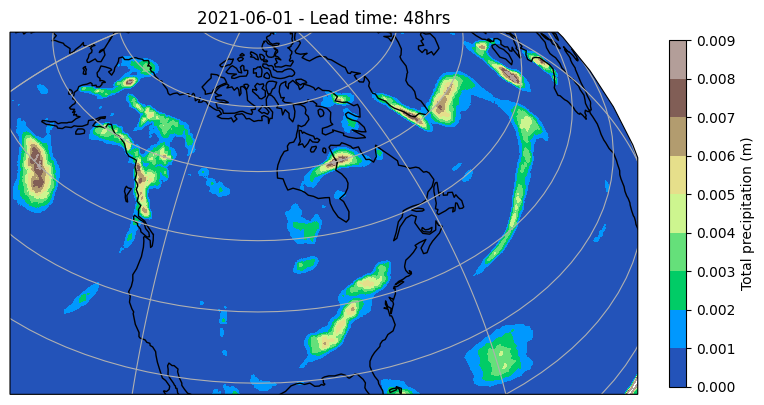

In [6]:
from datetime import datetime

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

forecast = datetime(2021, 6, 1)
variable = "tp"
step = 8  # lead time = 48 hrs

plt.close("all")
# Create a Orthographic projection of USA
projection = ccrs.Orthographic(-100, 40)

# Create a figure and axes with the specified projection
fig, ax = plt.subplots(subplot_kw={"projection": projection}, figsize=(10, 6))

# Plot the field using pcolormesh
levels = np.arange(0.0, 0.01, 0.001)
im = ax.contourf(
    io["lon"][:],
    io["lat"][:],
    io[variable][0, step],
    levels,
    transform=ccrs.PlateCarree(),
    vmax=0.01,
    vmin=0.00,
    cmap="terrain",
)

# Set title
ax.set_title(f"{forecast.strftime('%Y-%m-%d')} - Lead time: {6*step}hrs")

# Add coastlines and gridlines6
ax.set_extent([220, 340, 20, 70])  # [lat min, lat max, lon min, lon max]
ax.coastlines()
ax.gridlines()
plt.colorbar(
    im, ax=ax, ticks=levels, shrink=0.75, pad=0.04, label="Total precipitation (m)"
)

plt.savefig("outputs/02_tp_prediction.jpg")

## Important: Free up GPU Memory!
Run the below to free up GPU memory after training the model before moving to the next example.

In [ ]:
import os
os._exit(00)

In [1]:
# Set E2S cache space to avoid filling $HOME
!mkdir -p $SCRATCH/earth2cache & export EARTH2STUDIO_CACHE=$SCRATCH/earth2cache

## Exmple 2 - Generating CBottle Super Resolution Outputs

["Climate in a Bottle: Towards a Generative Foundation Model for the Kilometer-Scale Global Atmosphere" (ArXiv, Brenowitz)](https://arxiv.org/abs/2505.06474v1)

This example will demonstrate the `CBottle3D` diffusion model for super resolution of global
weather data. The `CBottleSR` model takes low-resolution climate data and generates
high-resolution outputs using a diffusion-based approach.

**Requires at least A100 40**

### Important Classes from `E2S`
For this example, we need the following components:

- Datasource: Generate data from the CBottle3D data api `earth2studio.data.CBottle3D`.
- Datasource: Pull data from the WeatherBench2 data api `earth2studio.data.WB2ERA5`.
- Diagnostic Model: Use the built in CBottle Infill Model `earth2studio.models.dx.CBottleInfill`.
- Super Resolution Model: Use the CBottleSR super resolution model `earth2studio.models.dx.CBottleSR`.

In [2]:
import os

os.makedirs("outputs", exist_ok=True)
from dotenv import load_dotenv

load_dotenv()

import torch

from earth2studio.data import WB2ERA5, CBottle3D, fetch_data
from earth2studio.models.dx import CBottleInfill, CBottleSR

# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the cBottle data source
package = CBottle3D.load_default_package()
cbottle_ds = CBottle3D.load_model(package)
cbottle_ds = cbottle_ds.to(device)

# Load the super resolution model
super_resolution_window = (
    0,
    -120,
    50,
    -40,
)  # (lat south, lon west, lat north, lon east)
package = CBottleSR.load_default_package()
cbottle_sr = CBottleSR.load_model(
    package,
    output_resolution=(1024, 1024),
    super_resolution_window=super_resolution_window,
)
cbottle_sr = cbottle_sr.to(device)

# Load the infill model
input_variables = ["u10m", "v10m"]
package = CBottleInfill.load_default_package()
cbottle_infill = CBottleInfill.load_model(
    package, input_variables=input_variables, sampler_steps=18
)
cbottle_infill = cbottle_infill.to(device)

# Load the ERA5 data source
era5_ds = WB2ERA5()

/glade/work/dhoward/E2S/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/glade/work/dhoward/E2S/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CuPy distance computation test failed with error: cuVS >= 24.12 or pylibraft < 24.12 should be installed to use this feature


2025-11-06 08:30:45.421 | DEBUG    | earth2studio.data.utils:_make_local_details:631 - Copying /weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr/.zattrs to local cache
2025-11-06 08:30:45.538 | DEBUG    | earth2studio.data.utils:_make_local_details:631 - Copying /weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr/.zmetadata to local cache
2025-11-06 08:30:45.544 | DEBUG    | earth2studio.data.utils:_make_local_details:631 - Copying /weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr/.zgroup to local cache
2025-11-06 08:30:45.739 | DEBUG    | earth2studio.data.utils:_make_local_details:631 - Copying /weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr/level/0 to local cache


### Super Resolution on Synthetic Data
First, let's generate synthetic climate data using the cBottle3D data source
and then perform super resolution on it. This demonstrates the full cBottle
pipeline from data generation to super-resolution enhancement.

In [ ]:
import datetime

import numpy as np

from earth2studio.utils.coords import map_coords

times = np.array([datetime.datetime(2020, 1, 1)], dtype="datetime64[ns]")

# Generate some samples from cBottle
synth_x, synth_coords = fetch_data(
    cbottle_ds,
    times,
    cbottle_sr.input_coords()["variable"],
    device=device,
)

# Perform super resolution on synthetic data
synth_x, synth_coords = map_coords(synth_x, synth_coords, cbottle_sr.input_coords())
sr_synth_x, sr_synth_coords = cbottle_sr(synth_x, synth_coords)

Generating cBottle Data:   0%|          | 0/1 [00:00<?, ?it/s]

### Super Resolution on ERA5 Data
Next, we'll demonstrate super resolution on real ERA5 data. Since ERA5 doesn't
contain all the variables needed by CBottleSR, we first use the CBottleInfill
model to predict the missing variables, then perform super resolution.



In [ ]:
# Get the ERA5 data (only u10m and v10m available)
era5_x, era5_coords = fetch_data(
    era5_ds,
    times,
    input_variables,
    device=device,
)

# Perform infilling to get all required variables
infill_x, infill_coords = cbottle_infill(era5_x, era5_coords)

# Select the required variables and reshape for super resolution
infill_x, infill_coords = map_coords(infill_x, infill_coords, cbottle_sr.input_coords())
sr_infill_x, sr_infill_coords = cbottle_sr(infill_x, infill_coords)

## Post Processing CBottle Super Resolution Data
Let's visualize the super resolution results to compare the synthetic data
approach with the ERA5 infilling approach. We'll plot the total cloud liquid
water (tclw) variable as an example.

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.close("all")

# Create projection focused on a region of interest (North Atlantic/Europe)
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(24, 24))

# Plot synthetic data
ax0 = fig.add_subplot(2, 2, 1, projection=projection)
extent = [
    super_resolution_window[1] - 10,
    super_resolution_window[3] + 10,
    super_resolution_window[0] - 10,
    super_resolution_window[2] + 10,
]
ax0.set_extent(extent, crs=ccrs.PlateCarree())
c = ax0.pcolormesh(
    synth_coords["lon"],
    synth_coords["lat"],
    synth_x[0, 0, 3, :, :].cpu().numpy(),  # u10m (variable index 3)
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r",
    vmin=-20,
    vmax=20,
)
plt.colorbar(c, ax=ax0, shrink=0.6, label="u10m (m/s)")
ax0.coastlines()
ax0.gridlines(draw_labels=True)
ax0.set_title("Synthetic Data (cBottle3D, low resolution)")

# Plot the synthetic super resolution data
ax1 = fig.add_subplot(2, 2, 2, projection=projection)
ax1.set_extent(extent, crs=ccrs.PlateCarree())
c = ax1.pcolormesh(
    sr_synth_coords["lon"],
    sr_synth_coords["lat"],
    sr_synth_x[0, 0, 3, :, :].cpu().numpy(),  # u10m (variable index 3)
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r",
    vmin=-20,
    vmax=20,
)
plt.colorbar(c, ax=ax1, shrink=0.6, label="u10m (m/s)")
ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_title("Synthetic Data Super Resolution (cBottle3D → CBottleSR)")

# Plot the ERA5 data
ax2 = fig.add_subplot(2, 2, 3, projection=projection)
ax2.set_extent(extent, crs=ccrs.PlateCarree())
c = ax2.pcolormesh(
    era5_coords["lon"],
    era5_coords["lat"],
    era5_x[0, 0, 0, :, :].cpu().numpy(),  # u10m (variable index 0)
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r",
    vmin=-20,
    vmax=20,
)
plt.colorbar(c, ax=ax2, shrink=0.6, label="u10m (m/s)")
ax2.coastlines()
ax2.gridlines(draw_labels=True)
ax2.set_title("ERA5 Data (low resolution)")

# Plot the ERA5 infilled super resolution data
ax3 = fig.add_subplot(2, 2, 4, projection=projection)
ax3.set_extent(extent, crs=ccrs.PlateCarree())
c = ax3.pcolormesh(
    sr_infill_coords["lon"],
    sr_infill_coords["lat"],
    sr_infill_x[0, 0, 3, :, :].cpu().numpy(),  # u10m (variable index 3)
    transform=ccrs.PlateCarree(),
    cmap="RdBu_r",
    vmin=-20,
    vmax=20,
)
plt.colorbar(c, ax=ax3, shrink=0.6, label="u10m (m/s)")
ax3.coastlines()
ax3.gridlines(draw_labels=True)
ax3.set_title("ERA5 Infilled Super Resolution (ERA5 → CBottleInfill → CBottleSR)")

plt.tight_layout()
plt.savefig("outputs/16_cbottle_super_resolution.jpg", dpi=150, bbox_inches="tight")